# Lecture 2 - Introduction to Social Media Analytics with Python

In this notebook we will learn the basics for analyzing  social media data with Python.  We will study tweets collected by keyword, tweets collected by user, and user profiles.  Some of the skills you will learn include searching and sorting dataframes and making bar and scatter plots.  For more details on the dataframe functions used in this notebook, you can look here: https://pandas.pydata.org/docs/index.html


Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.



# Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/social_media_genAI

import os
os.chdir("social_media_genAI/main")

Cloning into 'social_media_genAI'...
remote: Enumerating objects: 1696, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1696 (delta 7), reused 34 (delta 5), pack-reused 1655 (from 2)
Receiving objects: 100% (1696/1696), 172.00 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (1475/1475), done.


## Install Requirements



In [2]:
pip install -q -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 33.5 MB/s eta 0:00:00


## Import packages

We import the packages we are going to use.  A package contains several useful functions that make our life easier.

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this option makes it so tweets display nicely in a dataframe
pd.set_option("display.max_colwidth", None)

#this code sets the font sizes for plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})



# User Tweets

The tweets here were collected from the Twitter timelines of a set of users. They are stored in the csv file `"data/TwExportly/TwExportly_yale_tweets_2024_03_02.csv"`

### Load User Tweets

We can load the user tweets with the `pd.read_csv` function into a dataframe called `df`.

In [16]:
#filename of csv file
fname = 'data/TwExportly/TwExportly_yale_tweets_2024_03_02.csv'
df = pd.read_csv(fname)




### Look at the tweets using head() function
After we load the tweets in `df`, we look at the first few tweets using the `head` function.  We can specify how many rows to show using the `n` parameter.

In [9]:
df.head(n=2)

,tweet_id,text,language,type,bookmark_count,favorite_count,retweet_count,reply_count,view_count,created_at,client,hashtags,urls,media_type,media_urls
0,1764020124271452377,"Jason Stanley, a Yale philosopher and propaganda scholar, discusses his new book about how political messages can be embedded in seemingly straightforward statements — and how politicians often harness this phenomenon “in devious ways.” https://t.co/f0Fizm7KhA #Yale https://t.co/picZgwj6AY",en,Tweet,6,19,7,7,11243,2024-03-02 15:09:06,"<a href=""https://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",#Yale,http://bit.ly/49pWt5N,photo,https://pbs.twimg.com/media/GHsO8AUXUAA8xdV.jpg
1,1764011041950716273,"Motivated in part by the emergence of his own son’s allergy, @YaleMed rheumatologist Andrew Wang is working to understand an increase in autoimmune and allergic diseases and how the modern environment is affecting our immune system. #Yale https://t.co/YSooOUAJKR",en,Tweet,1,16,0,0,3467,2024-03-02 14:33:00,"<a href=""https://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",#Yale,https://medicine.yale.edu/internal-medicine/news-article/why-are-autoimmune-and-allergic-diseases-rising-andrew-wang/,NaN,NaN


### Sample Rows of Dataframe

The `head` function will give the first few rows of the dataframe.  We can use the `sample` function to randomly sample a fixed number of rows.

In [15]:
df.sample(n=2)

,tweet_id,text,language,type,bookmark_count,favorite_count,retweet_count,reply_count,view_count,created_at,client,hashtags,urls,media_type,media_urls
846,1628342083227471875,Josef Albers’s classic book on color relationships ranks among Yale University Press’ all-time bestsellers. It turns 60 this year. @yalepress @josefannialbers #Yale\nhttps://t.co/trpqQPcqU7,en,Tweet,4,39,11,1,7685,2023-02-22 05:33:00,"<a href=""https://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",#Yale,https://news.yale.edu/2023/02/17/book-color-never-fades,NaN,NaN
340,1673334050923134978,A new film by Emmy-winning director Habib Azar — now viewable online — presents a recent Yale staging of Igor Stravinsky’s masterpiece. #Yale https://t.co/ixvb3cuHEv,en,Tweet,0,26,1,1,5425,2023-06-26 10:15:01,"<a href=""https://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",#Yale,https://news.yale.edu/2023/06/20/new-film-captures-yale-staging-rite-spring,NaN,NaN


### Count Rows in Dataframe

We can use the `len` function to find out how many rows a dataframe has.  Let's find out how many tweets contain our keyword, and then print out the result. We can use the column we just created for this to make the code cleaner.

In [14]:
#the len function tells you how many rows in a dataframe
n = len(df)

print(f"There are {n} tweets in dataframe")

There are 980 tweets in dataframe


### Select Columns of Dataframe

Sometimes we just want to look at a few columns of the dataframe.  We can do this by putting the names of the columns we want into a *list*.  In Python, lists have the format `[item_1,item_2,...,item_n]`.

In [19]:
cols = ['retweet_count','text']
df[cols].head(n=12)

,retweet_count,text
0,7,"Jason Stanley, a Yale philosopher and propaganda scholar, discusses his new book about how political messages can be embedded in seemingly straightforward statements — and how politicians often harness this phenomenon “in devious ways.” https://t.co/f0Fizm7KhA #Yale https://t.co/picZgwj6AY"
1,0,"Motivated in part by the emergence of his own son’s allergy, @YaleMed rheumatologist Andrew Wang is working to understand an increase in autoimmune and allergic diseases and how the modern environment is affecting our immune system. #Yale https://t.co/YSooOUAJKR"
2,3,"Reversing the effects of common blood-thinning medications is crucial for patients experiencing a brain bleed — and, according to a new Yale study, such treatment is more urgent than previously understood. @YaleMed #Yale https://t.co/yQgrvjyHKs"
3,2,Scientists have long puzzled over the cause of so-called “Snowball Earth” periods of global glaciation in the planet’s distant past. A new study by Yale researchers offers a novel theory — large asteroid impacts. https://t.co/BzbkW4XFX0 #Yale https://t.co/37j3oZC32e
4,4,"U.S. museums have seen a wave of unionization in recent years. In a new paper, @YaleSOM experts examine museum labor trends and offer guidance to parties on both sides of the table at mission-driven organizations. #Yale \nhttps://t.co/ih416jVKk5"
5,1,"A new Yale School of Public Health co-led study finds that childhood obesity rates have more than doubled in Samoa in the last decade, with one in 10 children as young as six now at risk of diabetes. @YaleSPH #Yale \nhttps://t.co/vj7HMqD9G5"
6,3,"Sven Eenmaa ’98 M.B.A., director of investment and economic analysis at the International Space Station U.S. National Laboratory, explains the state — and prospects — of the burgeoning outer-space economy. @YaleSOM #Yale \nhttps://t.co/kstlUJlQnN"
7,1,"In a new study, Yale researchers discovered specific genetic mutations that suppress a plant’s growth but don’t affect its ability to flower, an insight that may lead to advances in agriculture. https://t.co/GWuGWowGm3 #Yale https://t.co/pA3ePXYYEU"
8,3,"What do Yalies in Palm Beach, New York, Atlanta, and Houston have in common? They're all celebrating FEB CLUB of course!! 🙌 🎉 \n\nFind your nearest Feb Club gathering now: https://t.co/lqauzC58dZ https://t.co/iDkzKihEhH"
9,4,"Two new exhibitions at the Yale University Art Gallery highlight, respectively, Expressionist prints from an early-20th-century Europe beset by crisis and visual design by a trailblazing champion of advocacy and inclusion. @YaleArtGallery #Yale https://t.co/FXeRynHtkR"


### Sort Rows By Column Values
We can sort a dataframe's rows by the values in a column with the `sort_value` function.  It takes as input a list of columns, and an optional parameter `ascending` which can be `True` or `False`.

Let's sort the tweets in order of decreasing `retweet_count`.

In [21]:
cols  =['retweet_count','text']
df.sort_values(by = ['retweet_count'], ascending = False)[cols].head(n=5)

,retweet_count,text
971,2936,"Bobbi, 9, was the subject of alleged racial profiling while working to eradicate the invasive spotted lanternfly in Oct. Last week, she was honored by @Yale. The lanternflies she donated to @yalepeabody will be forever associated with her name.\n\nMore: https://t.co/gWKQDzD7el https://t.co/uxuLQoRSOv"
932,229,"Bobbi Wilson, 9, was hunting for spotted lanternflies in New Jersey when a neighbor called the police on her. But Wilson's efforts to eradicate the bugs has been widely praised, landing her collection in the archives of the Yale Peabody Museum. https://t.co/jt0FY4eFMS"
418,148,"”The most important job I do is teaching.”\n\nThe morning he learnt he received the 2018 prize in economic sciences, Bill Nordhaus taught his @Yale intermediate macroeconomics class. His press conference regarding the announcement had to be postponed so he could finish his class. https://t.co/2BhJcz9rYi"
70,83,"Yale Divinity School on Wednesday broke ground on the Living Village, an ambitious residence hall for divinity students expected to give back more to the natural environment than it takes.\n\nRead more in Yale News: https://t.co/VkdAeXZ0e0 #Yale @YaleDivSchool https://t.co/d1mEIPOCMb"
793,80,IVY LEAGUE CHAMPIONS for the third time in the last four seasons 🏆\n\n#ThisIsYale https://t.co/ZoBBk9B9PU


### Search for Tweets Containing Keywords

We can search for tweets in the dataframe which contains a specific keyword.  We do this with the `contains` function.  This function takes the keyword as input in the form of a string (this means you put the word inside quotes).  It also has a parameter `case` which is `True` if you want to match the case of the keyword.

In [35]:
 keyword = 'AI'
 df[df['text'].str.contains(keyword, case=True)]['text']

,text
21,"AI programs don’t themselves have First Amendment rights, so who’s ultimately responsible for the text they create? Yale constitutional law scholar Jack M. Balkin offers an overview of this emerging legal quandary. @YaleLawSch #Yale \nhttps://t.co/gsh8BNSK71"
265,"Having pioneered a streamlined approach to automaking that uses AI and 3D-printing technologies, Kevin Czinger ’82, ’87 J.D. and Lukas Czinger ’17 are taking their shared ambition to the streets.\n\nRead more from Yale News: https://t.co/WY7Ml3KttM #Yale @YaleSEAS @CzingerVehicles https://t.co/DhXQkDntLB"
268,Constitutional law scholar Robert Post discusses how AI may force society to rethink the parameters of one’s own image as intellectual property. @YaleLawSch #Yale https://t.co/brY5cw9CYi
272,"In the latest @YaleDivSchool “Quadcast,” professor John Pittard discusses how artificial intelligence (AI) affects religious practice and argues for a global alliance to regulate the emerging technology. \n\nListen to the new episode here: https://t.co/e6BZNpE7yA #Yale https://t.co/rdB077GHIL"
287,"Most AI expert voices tend to fall into five distinct categories: euphoric true believers, commercial profiteers, curious creators, alarmist activists, and global governistas, according to Yale faculty and prominent economists. @yalesom #Yale #AI https://t.co/ymWL6L5Tfo"
301,Yale School of Management recently asked business leaders for some real talk about how their companies are using AI technology. Here's what they said. @YaleSOM #Yale https://t.co/DRxmheEhDp
400,Learn about how a new AI platform aiming to improve disaster response started as a Jackson School of Global Affairs class project: https://t.co/IzQcMfxKGZ @JacksonYale #Yale https://t.co/TkxfL5jlBu
658,Pauli Murray ’65 J.S.D. broke barriers and helped reimagine American justice. The Yale college that bears her name recently unveiled a new mosaic mural that pays fitting tribute to her enduring legacy.\n\nRead more from Yale News: https://t.co/A6PvRw3pL9 #Yale https://t.co/AIoNy2uLQu
738,"In an interview, Yale’s Alfred Guy discusses the potential dangers and opportunities presented by ChatGPT and how educators can utilize the platform and other AI technologies to improve student writing. @PoorvuCenter #Yale #ChatGPT\nhttps://t.co/rhhMEWVHX0"
781,"In an interview, Yale’s Alfred Guy discusses the potential dangers and opportunities presented by ChatGPT and how educators can utilize the platform and other AI technologies to improve student writing. @PoorvuCenter #Yale #ChatGPT\nhttps://t.co/rhhMEWVHX0"


### Statistics of Columns

There are built-in functions in a dataframe to calculate many different statistis, such as `mean`, `median`, `variance`, `std`, and `quantile`.  For `quantile` we need to set the quantile we want in the variable `q`.

In [37]:
mean = df['retweet_count'].mean()
med = df['retweet_count'].median()
std = df['retweet_count'].std()
q = 0.9
quant = df['retweet_count'].quantile(q)

print(f"Retweet count mean = {mean:.2f}")
print(f"Retweet count median = {med:.2f}")
print(f"Retweet count st. dev. = {std}")
print(f"Retweet count {q:.2f} quantile = {quant}")

Retweet count mean = 10.27
Retweet count median = 5.00
Retweet count st. dev. = 94.22051234044716
Retweet count 0.90 quantile = 13.0


### Add Column to Dataframe

We can add a column to the dataframe to make data analysis easier.  Let's add a column called `"has_keyword"` which is `True` if the tweet has the word "eminem".  This can be done by doing `df["has_keyword"] = column you want to add`.  In our case, the column we want to add is given by `df.text.str.contains(keyword, case = False)`.

In [38]:
keyword = 'AI'
ind = df.text.str.contains(keyword, case = True)
df['has_keyword'] = ind
cols = ['has_keyword','text']

df[cols].head()

,has_keyword,text
0,False,"Jason Stanley, a Yale philosopher and propaganda scholar, discusses his new book about how political messages can be embedded in seemingly straightforward statements — and how politicians often harness this phenomenon “in devious ways.” https://t.co/f0Fizm7KhA #Yale https://t.co/picZgwj6AY"
1,False,"Motivated in part by the emergence of his own son’s allergy, @YaleMed rheumatologist Andrew Wang is working to understand an increase in autoimmune and allergic diseases and how the modern environment is affecting our immune system. #Yale https://t.co/YSooOUAJKR"
2,False,"Reversing the effects of common blood-thinning medications is crucial for patients experiencing a brain bleed — and, according to a new Yale study, such treatment is more urgent than previously understood. @YaleMed #Yale https://t.co/yQgrvjyHKs"
3,False,Scientists have long puzzled over the cause of so-called “Snowball Earth” periods of global glaciation in the planet’s distant past. A new study by Yale researchers offers a novel theory — large asteroid impacts. https://t.co/BzbkW4XFX0 #Yale https://t.co/37j3oZC32e
4,False,"U.S. museums have seen a wave of unionization in recent years. In a new paper, @YaleSOM experts examine museum labor trends and offer guidance to parties on both sides of the table at mission-driven organizations. #Yale \nhttps://t.co/ih416jVKk5"


## Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  If you want to summarize all the statistics, use the `describe` function.  We do this for the `retweet_count` column.

In [42]:
df.groupby('has_keyword')['retweet_count'].describe()


,count,mean,std,min,25%,50%,75%,max
has_keyword,,,,,,,,
False,966.0,10.333333,94.899056,0.0,3.0,5.0,8.00,2936.0
True,14.0,5.928571,3.751190,2.0,3.0,4.5,7.75,13.0


# Combining User Tweets

TwExportly gives us one file of tweets per user.  We want to put the tweets of all users into one big dataframe and then analyze them.  

## Put Tweets into Single DataFrame

We need to combine all the TwExportly files into a single dataframe, and also add a `"screen_name"` column so we know whose tweets they are.  The screen name is in the middle of the filename.  This is tricky.  We can do this easily if we give the AI the correct prompt.

In [52]:
# prompt: the files in the folder data/TwExportly have format
#TwExportly_<screen_name>_....  write code to go through these
#files and print out each ones screen_name, and also load the
#fiel inte a dataframe and then concateneate all the dataframes
#into one big one called df. add a screen_name column to the
#dataframe with each screen_name. display the head of df jsut
#screen_name and text cols

import os
import pandas as pd

# Assuming 'data/TwExportly' is in the current working directory
folder_path = 'data/TwExportly'
all_files = os.listdir(folder_path)

df_list = []

for filename in all_files:
    if filename.startswith("TwExportly_"):
        screen_name = filename.split("_")[1]
        print(f"Screen Name: {screen_name}")
        file_path = os.path.join(folder_path, filename)
        try:
            temp_df = pd.read_csv(file_path)
            temp_df['screen_name'] = screen_name  # Add screen_name column
            df_list.append(temp_df)
        except pd.errors.EmptyDataError:
            print(f"Warning: {filename} is empty. Skipping.")
        except pd.errors.ParserError:
            print(f"Warning: Could not parse {filename}. Skipping")


if df_list:
    df = pd.concat(df_list, ignore_index=True)
    display(df[['screen_name', 'text']].head())
else:
    print("No valid data files found in the specified directory.")

Screen Name: elonmusk
Screen Name: 1future
Screen Name: Cobratate
Screen Name: RealAlexJones
Screen Name: AmericanAir
Screen Name: kamalaharris
Screen Name: kingjames
Screen Name: StephenCurry30
Screen Name: potus
Screen Name: joebiden
Screen Name: mkbhd
Screen Name: dunemovie
Screen Name: yale
Screen Name: mrbeast
Screen Name: MadameWeb


,screen_name,text
0,elonmusk,@TheChiefNerd True
1,elonmusk,@imPenny2x Coming soon
2,elonmusk,@damonimani 😂
3,elonmusk,@Teslaconomics Thanks 😂
4,elonmusk,Today's @StateFarm Player Of The Game was an easy choice ... Congrats @jaxon_smith1 🫡 #ad https://t.co/Ltq7r7nzkP


## Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  We do this for the `retweet_count` column.

In [55]:
df.groupby('screen_name')['retweet_count'].mean()



,retweet_count
screen_name,
1future,3818.878218
AmericanAir,0.257778
Cobratate,1287.417339
MadameWeb,254.675676
RealAlexJones,2173.791375
StephenCurry30,1833.248039
dunemovie,315.421281
elonmusk,3530.987000
joebiden,4328.609172


## Barplot Retweet Count of Groups

We can make a bar graph of the retweet count of the users.  To make the plot, we use the `barplot` function in the *seaborn* package.  Details on the seaborn package can be found here: https://seaborn.pydata.org/#

To use `barplot`, we need to input the `data`, which is the dataframe, `x`, which is the name of the column for the x-axis, and `y`, which is the name of the column for the y-axis.  There are many other functions that let us edit the plot to make it look nice.  These are from the *matplotlib* package.  One parameter is the `color` parameter.  A complete list of colors is found here: https://matplotlib.org/stable/gallery/color/named_colors.html

We can make a barplot of a column value on the y-axis, and the group on the x-axis.  Seaborn knows to group together tweets in the same group, and plot the mean value along with error bars. In this case, we will plot `retweet_count` on the y-axis, and the groups are the `screen_name` column.

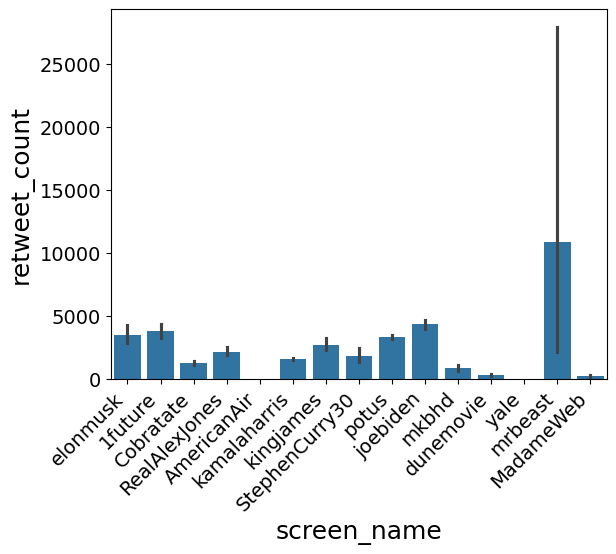

In [71]:
''' prompt: We can make a barplot of a column value on the
y-axis, and the group on the x-axis. Seaborn knows to group
together tweets in the same group, and plot the mean value
along with error bars. In this case, we will plot retweet_count
on the y-axis, and the groups are the screen_name column.
'''

sns.barplot(data=df, y='retweet_count', x='screen_name')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.show()

## Subplots

We can plot two figures side by side using the `subplot` function.  You need to specify the number of rows and columns in your subplot grid, and specify which grid box the plot goes in.  It is something like this: `subplot(rows, columns, box_number)`.  Lets make side by side subplots of the `retweet_count` and `view_count`.


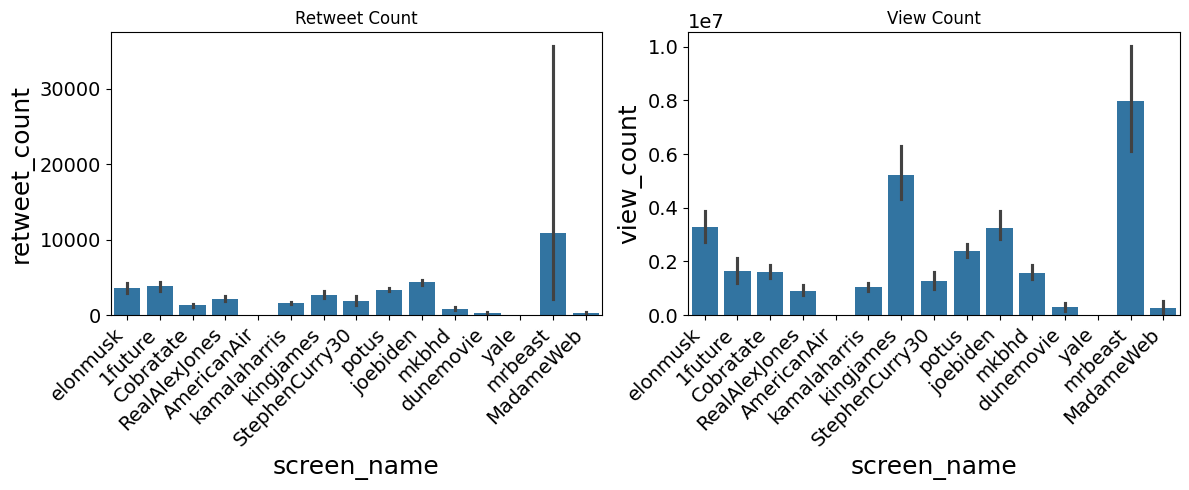

In [74]:
# prompt: We can plot two figures side by side using the `subplot` function.  You need to specify the number of rows and columns in your subplot grid, and specify which grid box the plot goes in.  It is something like this: `subplot(rows, columns, box_number)`.  Lets make side by side subplots of barplots of
#  the `retweet_count` and `view_count`.

plt.figure(figsize=(12, 5))  # Adjust figure size for better visualization

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=df, y='retweet_count', x='screen_name')
plt.xticks(rotation=45, ha='right')
plt.title('Retweet Count')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=df, y='view_count', x='screen_name')
plt.xticks(rotation=45, ha='right')
plt.title('View Count')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

## Compare Retweet Count of Tweets Containing Different Keywords

We can compare the retweet count of tweets that contain a keyword versus those that do not.  We do this by defining the variable `keyword` which is the keyword we care about, and then adding a column to the dataframe called `has_keyword_{keyword}` that is `True` if the tweet has the word.  The `{keyword}` means the column name will have the actual keyword, which makes things easier to analyze.  We can then plot the retweet count grouped by screen name, and separate within the group those where `has_keyword_{keyword}` is `True` and `False`.  We use the `hue` parameter for this in-group separation.

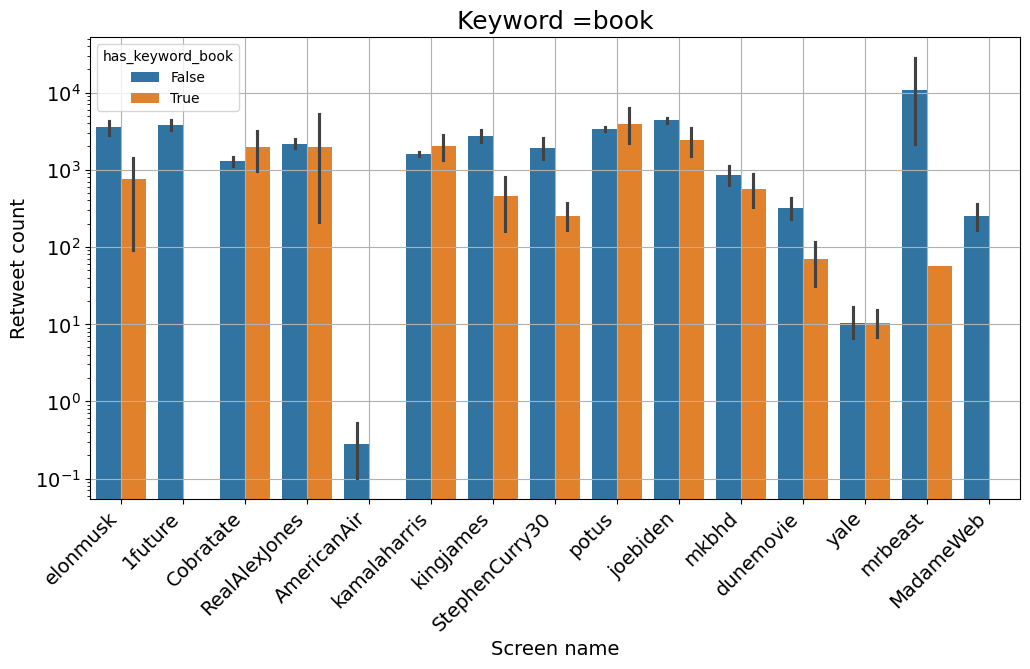

In [111]:
keyword = 'book'
ind = df.text.str.contains(keyword, case = False)
df[f'has_keyword_{keyword}'] = ind

fig = plt.figure(figsize = (12,6))
sns.barplot(data = df,
            x = 'screen_name',
            y = 'retweet_count',
            hue = f'has_keyword_{keyword}')
plt.xlabel('Screen name',fontsize  = 14)
plt.ylabel('Retweet count',fontsize  = 14)
plt.title(f"Keyword ={keyword}",fontsize = 18)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

## Describe Groups

We can group the tweets by `screen_name` and `has_keyword` using the `groupby` function.  Then we can summarize the statistics of the groups in a dataframe by using the `describe` function.

In [112]:
keyword = 'book'
print(f"Keyword is {keyword}")
cols = ['screen_name',f'has_keyword_{keyword}']
df.groupby(cols)[['retweet_count']].describe()

Keyword is book


retweet_count                               \
                                        count          mean            std   
screen_name    has_keyword_book                                              
1future        False                   1010.0   3818.878218    9099.258579   
AmericanAir    False                    838.0      0.276850       3.086133   
               True                      62.0      0.000000       0.000000   
Cobratate      False                    985.0   1282.600000    2656.281067   
               True                       7.0   1965.285714    1564.564872   
MadameWeb      False                     37.0    254.675676     323.451959   
RealAlexJones  False                    836.0   2178.503589    4631.850746   
               True                      22.0   1994.727273    6649.012223   
StephenCurry30 False                    984.0   1891.082317    9610.636038   
               True                      36.0    252.444444     316.154433   
dunemovie      False                    906.0    319.475717    1534.719029   
               True                      15.0     70.533333      90.703494   
elonmusk       False                    998.0   3536.548096   11135.543128   
               True                       2.0    756.000000     940.452019   
joebiden       False                    993.0   4347.589124    5709.199850   
               True                      10.0   2443.900000    1620.489326   
kamalaharris   False                   1003.0   1591.329013    1401.680926   
               True                      12.0   2031.833333    1483.363796   
kingjames      False                   1006.0   2738.287276    8346.380058   
               True                      10.0    458.000000     522.370452   
mkbhd          False                    955.0    851.017801    3861.476545   
               True                      14.0    565.714286     584.447330   
mrbeast        False                    401.0  10931.000000  166975.062766   
               True                       1.0     56.000000            NaN   
potus          False                    962.0   3352.967775    2696.783126   
               True                       9.0   3942.222222    3199.860848   
yale           False                    953.0     10.265477      95.529714   
               True                      27.0     10.444444      11.084755   

                                                                              
                                    min      25%     50%      75%        max  
screen_name    has_keyword_book                                               
1future        False                0.0   114.25   470.5  2867.00   118882.0  
AmericanAir    False                0.0     0.00     0.0     0.00       58.0  
               True                 0.0     0.00     0.0     0.00        0.0  
Cobratate      False                2.0   107.00   313.0  1094.00    27530.0  
               True               333.0  1059.50  1806.0  2260.50     4978.0  
MadameWeb      False                1.0    78.00   152.0   324.00     1806.0  
RealAlexJones  False                1.0   237.25   712.0  2253.00    60396.0  
               True                28.0    50.25   208.5   527.25    30911.0  
StephenCurry30 False                0.0    51.75   205.0   836.00   184703.0  
               True                 2.0    85.25   165.5   320.00     1750.0  
dunemovie      False                0.0     2.00    43.5   180.00    27631.0  
               True                 1.0    12.50    19.0    93.00      276.0  
elonmusk       False                0.0    66.00   143.0   537.25    87039.0  
               True                91.0   423.50   756.0  1088.50     1421.0  
joebiden       False                0.0  1741.00  2919.0  5016.00   100679.0  
               True                29.0  1413.75  2228.0  3491.75     5381.0  
kamalaharris   False                0.0   737.50  1181.0  1934.00    13638.0  
               True              

# User Profiles

We can collect the following of Twitter users with the TwFollow Chrome plugin.  The files are saved in `"data/TwFollow"`.  We will load one of these files and analyze it.

## Load Following of User

In [123]:
file_path = "data/TwFollow/TwFollow_yale_following_2025_01_22_0_1882245577513631448.csv"
df = pd.read_csv(file_path)
print("DataFrame loaded successfully.")
df.head(2)

DataFrame loaded successfully.


,name,username,userId,can_dm,created_at,bio,tweets_count,followers_count,following_count,favourites_count,location,media_count,profile_banner_url,profile_url,avatar_url,verified,blue_verified
0,Yale ICF,YaleICF,'2319464228',False,2014-01-30 15:11:33,Providing academic & professional support for research in financial economics @YaleSOM. #YaleICF #SOMfinfac #ICF_FinancialHistoryFriday #YaleBlockchain,3991,2091,270,2567,"New Haven, CT",1004,https://pbs.twimg.com/profile_banners/2319464228/1573678017,https://www.twitter.com/YaleICF,https://pbs.twimg.com/profile_images/1037420397917032448/zwENVZBx_normal.jpg,False,False
1,Yale Insights,YaleInsights,'36769917',True,2009-04-30 16:55:14,"Deepen your knowledge of business and society with expertise from @YaleSOM, the Yale School of Management. Sign up for the newsletter: https://t.co/PuFzVVRnI7",4985,6216,834,1605,"New Haven, CT",426,https://pbs.twimg.com/profile_banners/36769917/1549036846,https://www.twitter.com/YaleInsights,https://pbs.twimg.com/profile_images/877940202161000449/VTSS25h__normal.jpg,False,False


## Follower Count and Keyword

Lets look at the mean follower count for accounts that have and do not have a keyword of your choice in their bio.



In [126]:
# prompt: Lets look at the mean follower count for accounts that have and do not have a keyword of your choice in their bio.

keyword = 'AI'  # Replace with your desired keyword
df['has_keyword'] = df['bio'].str.contains(keyword, case=False, na=False)

mean_follower_counts = df.groupby('has_keyword')['followers_count'].mean()
mean_follower_counts

,followers_count
has_keyword,
False,148029.595142
True,82058.914286


## Subplots


We can plot two figures side by side using the `subplot` function.  You need to specify the number of rows and columns in your subplot grid, and specify which grid box the plot goes in.  It is something like this: `subplot(rows, columns, box_number)`.

Let's make 2 subplots of the follower count and following count for bios which have and dont have a keyword of your choice.

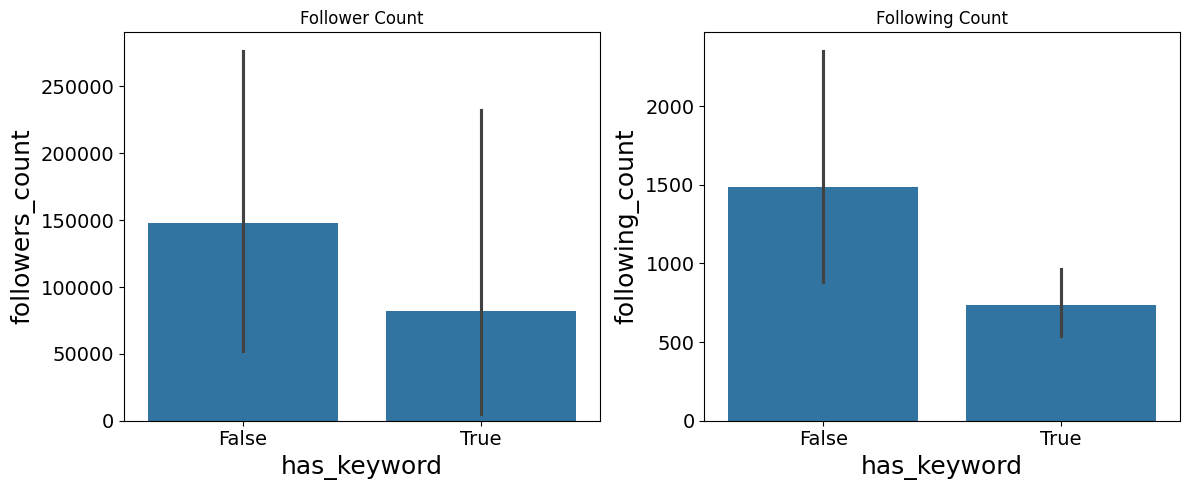

In [127]:
''' prompt: Let's make 2 subplots of the follower
count and following count for bios which have and
dont have a keyword of your choice.
'''

import matplotlib.pyplot as plt
import seaborn as sns

keyword = 'AI'  # Replace with your desired keyword
df['has_keyword'] = df['bio'].str.contains(keyword, case=False, na=False)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='has_keyword', y='followers_count')
plt.title('Follower Count')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='has_keyword', y='following_count')
plt.title('Following Count')

plt.tight_layout()
plt.show()

## Ask AI to Try Something

Ask the AI to perform some kind of analysis on the Twitter bio data.  You would be surprised what it can without you knowing any code.

In [130]:
'''prompt: make a scatter plot of the follower count vs
media count of the accounts in df and title the plot
with the correlation of the two variables.
'''

